<a href="https://colab.research.google.com/github/nilsberzins/Stochastic-Processes-Report/blob/main/Stochastic_Processes_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a Stochastic Process?

A random process is defined as a family of random variables in a probability space, which are indexed by time.

**In other words:** A stochastic process is just a way of describing how something random evolves over time. At each point in time, you can think of the process as producing a random variable, and together these random variables trace out a path that represents one possible realization of the process.


## Martingales

####**Definition**


Martingale is a stochastic process that formalizes the idea of a “fair game.” Given a sequence of random variables $ \{X_{n}\} $ adapted to an information structure (also known as filtration) $ \{F_{n}\} $, the martingale condition is:

$$ E[X_{n+1} | F_{n}] = X_{n} $$

In other words, the best prediction of the next outcome, given everything we know so far, is simply the present value.

####**Martingale Fundamentals**


To fully understand Martinagles, we'll need to cover some prerequisite concepts.


***Expectation***
  
The expectation $ E[X] $ of a random variables $ X $ is the theoretical "average" outcome if the random process were repeatedly infinitely many times. So, for a continuous random variables with density $ f(x)$, or $ Σxp(x) $ for a discrete random variable...

$$ E[X] = ∫xf(x)dx  $$

Supposed you flip a fair coin: heads = 1, tails = 0. The expected value of that fair coin is:

$$ E[X] = 1 × 0.5 + 0 × 0.5 = 0.5 $$

This means you filpped this coin many times, on average half of the outcomes would  be heads.

***Conditional Expectation***

Conditional expectation $ E[X|Y] $ is the best estimate of $ X $ given knowledge of $ Y $. It refins the expectation by restricting the "universe" of possibilties.

Now imagine you've already flipped one coin. If it came up heads, then given that knowledge, the expected value is 1; if tails, its 0. Formally, $ E[X_2 | X_1] $ just says: once you know the past, your estimate of the future reflects that information. This reliance on past information is the backbone of martingale definitions: tomorrow's best estimate is today's value.

***Filtration***

A filtration $ \{F_{n}\}_{n \geq 0} $ is a growing collection of σ-algebras , where each $ F_{n} $ represents all information available up to time n.

Continuing with the coin toss example, after two flips, $ F_{2} $ contains the outcomes of both tosses, while $ F_{1} $ contains only the first. As we continue flipping the coin n times, the information pool of the filtration only grows...

$$ F_n \subseteq F_{n+1}$$

***Integrability***

For martingales, we assume $ E[|X_n|] < ∞ $. This ensures our conditional expectations are well-defined and avoids "exploding" processes.  

Bringing this all together, we can express the martinagle property:

$$ E[X_{n+1} | F_n] = X_n $$

This expresses the fair game principle alluded to before: given all past information ($F_n$), your expected next value is exactly the current value. In the coin flipping example, if you bet $1 on each toss, your expected future wealth given the past is always equal to your current wealth. If this seems initially unintuitive, just remember that the expected value of the fair is **not** equivalent to a guaranteed outcome. It just means that’s over many possible futures and iterations of the fair coin game, your future wealth is expected to be your current wealth.

####**Martingale Deep Dive**

Martingales go beyond the simple fair game definition we explored above. They provide a framework to bifurcate processes into predictable and unpredictable components. And through Doobs Decomposition we can outline **any** integrable, adapted process $ X_n $ by decomposing it below:

$$ X_n = M_n + A_n $$

Where $ M_n $ is a martingale and $ A_n $ is a predictable, finite-variation process (or what is called the “drift”). In essence, the martingale functions as the “noise core” from any stochastic process. Once you’ve stripped away all of the systematic, forecastable structure in the model, what you have left is the unpredictable randomness, our martingale, which is only a measure of the information we have up until that point. To clarify the future unpredictability of the martingale condition, consider this difference sequence:

$$ D_{n+1} = X_{n+1} - X_n $$ where $$ E[D_{n+1} | F_n] = 0 $$

The difference sequence effectively states that given everything we know (the filtration variable), we cannot predict a change between the current and next state.

Where we start to see changes in the n+1 case is when we reintroduce the $ A_n $ drift predictor. Upward and downward drifts are referred to as Submartingales and Supermartingales, respectively.

Submartingales: $ E[X_{n+1} | F_n] ≥ X_n $. Models processed with upward drift

Supermartingales: $ E[X_{n+1} | F_n] ≤ X_n $. Models processed with downward drift.

####**Martingale Real-World Application**

Martingales are most famoulsy applied in financial mathematics, where they provide the foundation for risk-neutral pricing in the Black-Scholes framework. When asset prices are discount at the risk-free rate (for example, a U.S. treasury), they behave as martingales, ensuring the absence of arbitrage (exploitable price imabalances in assets) and reinforcing hte idea of a "fair game". Beyond finance, martinagles appear in machine learning, particulalry in the analysis of stochastic gradient descent (SGD). The noise introduced by random sampling in SGD forms a martingale difference sequence, which allwos researchers to prove convergence properties of learning algorithms. Similarly, in reinforcement learning, temporal difference (TD) learning errors can be framed as martingales, making it possible to show that updates do not introduce systematic bias over time. In statistics and survival analysis, martingale residuals are used to assess model adequacy and highlight unexplained variation, showing how martingale techniques extend from theory into applied modeling.

####**Martingale Simulation**

We'll refer back to the fair coin betting scenario mentioned earlier to highlight the change of an individuals wealth over many iterations of the game.

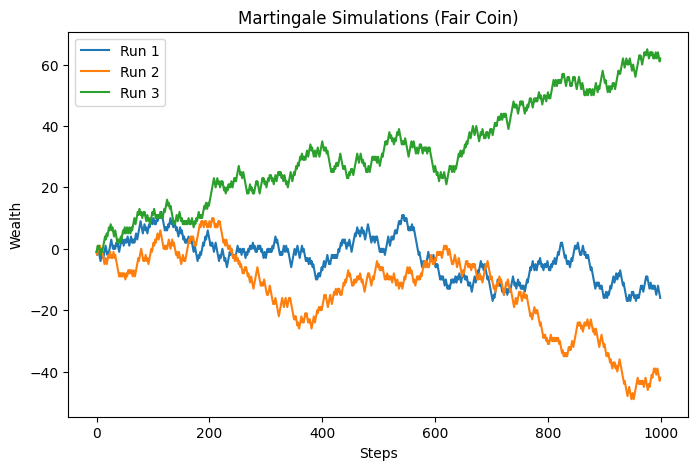

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

plt.figure(figsize=(8,5))
for i in range(3):  # three runs
    steps = np.random.choice([-1, 1], size=n)
    martingale = np.cumsum(steps)
    plt.plot(martingale, label=f"Run {i+1}")

plt.title("Martingale Simulations (Fair Coin)")
plt.xlabel("Steps")
plt.ylabel("Wealth")
plt.legend()
plt.show()


####**Martingale Example Problem**

A gambler plays a fair game where at each round they either win \$1 or lose \$1 with equal probability. They start with \$5 and stop playing once they either reach $10 or lose everything. What is the probability the gambler doubles their wealth before going broke?

**Hint:** This is the Gambler's Ruin problem. Use the martingale property of the gambler's fortune and apply the Optional Stopping Theorem at the stopping time when wealth hits either boundary.

*Solution at the bottom of the report*

## Renewal Processes

####**Definition**


A renewal process models system that reset after random intervals. A classic example is machine replacement: when a part fails, it is replaced, and the system renews.

####**Renewal Process Fundamentals**

Just as with Martingales, understanding Renewal Processes requires some prerequisite knowledge.

***Poisson Processs as a Starting Point***
A Poisson prcoess models random arrivals of events over time, with properties:


*   Inter-arrival times are exponential with mean $ \frac{1}{λ}$ (see Exponential Distribution below)
*   Memoryless property: $ P(T>s+t | T>s) = P(T > t) $
*   Future events are independent of the past

Note that the memoryless property implies that future arrivals are independent of the past. Formally since $ P(T>s+t|T>s) = P(T>t) $, the probability of waiting at least an additional t unit of time is unaffected by how much time s has already passed without an event. In other words, no matter when the last event occurred, only the next waiting period matters.

***Exponential Distribution***

Now, when we say inter-arrival times are exponential, we mean that they follow an exponential distribution: a process in which events occur continuously and independently at a constant average rate.

The probability density function (pdf) of an exponential distribution is

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Here λ (or the "rate parameter") is the parameter of the distribution, supported on the interval of [0, ∞].

The mean or expected value of an exponentially distributed random variable $ X $ with rate parameter λ is given by

$$ E[X] = \frac{1}{λ} $$

Imagine bses arriving at your bus stop: if buses arrive with exponentially distributed times between them, the process is memoryless. If you've already waited 5 minutes, your expected additional wait is the same.

***Renewal Generalization***

Renewal processes actually relax the above exponenetial assumption: inter-arrival times $T_1, T_2...$ are independently and identically distributed (i.i.d.) but from an arbitrary distribution F with mean μ.

*   This breaks the memorylessness: past events now influence how long until the next event occurs.
*   The process N(t) counts how many renewals have occurred by time t.

Going back to the bus example, now suppose the buses have a schedule but variable arrival times - sometimes 10 minutes, sometimes 15, sometimes 5. The inter-arrival times are i.i.d. but not exponential.

***Renewal Function***

$$ M(t)=E[N(t)] $$

captures the expected number of  renewals up to time t. The elementary Renewal Theorem (ERT) states:

$$ \lim_{t \to ∞} \frac{M(t)}{t} = \frac{t}{\mu} $$

So, on average, the long-run renewal rate stabilizes at the reciprocal of the mean inter-arrival time.


####**Renewal Process Deep Dive**

As alluded to above, renewal processes extend the Poisson process into settings where inter-arrival times are not exponential, usually for modeling realistic lifetime or failure/replacement systems.

To reiterate, the Elementary Renewal Theorem states that the expected number of renewals, $ E[N(t)] $, divided by time t, approaches the reciprocal of the mean interarrival time, $ \frac{1}{μ} $, as time t goes to infinity.

But what if our first inter-arrival time $T_1$ has a different distribution G from the overarching distribution F of later inter-arrival times? In this case, our renewal process is called "delayed". As you might expect, the delayed start permanently affects the early-time behavior before long-run averages kick in. Formally,

$$ M_D(t) = G(t) + \int_{0}^{t} M(t-u) \, dG(u) $$

In other words, this states that the total expected number of renewals by time t is the sum of the change that the first renewal happens before t and the expected number of renewals generated after that first renewal, averaged over all possible first-renewal times.

There are many applications to this specific variation of renewal processes, some of which are explored below.

At times, reward systems can be attached to renewal processes, giving us the Renewal Reward theorem.
Where the cumulative reward by time t states…

$$ R(t) = Σ_{i=1}^{N(t)} R_i $$

The Renewal Reward Theorem tells you, on average, you get η reward per cycle and cycles occur at rate $ \frac{1}{μ} $.

$$ \lim_{t \to \infty} \frac{R(t)}{t} = \frac{\mathbb{E}[R]}{\mathbb{E}[T]} = \frac{\eta}{\mu}
$$

Therefore, your reward per unit time approaches $ \frac{\eta}{\mu} $ as t approaches infinity.

Another important thing to note is that a “reward” does not necessarily imply a positive gain. In this context, a “reward” can represent any measurable quantity associated with a renewal cycle. For instance, a “reward” could capture costs incurred when a machine part is replaced, or downtime lost during service.

Now you might have caught on that although the long run stabilization of the average number of renewals per unit time settles at $ \frac{1}{μ}, there will still be fluctuations around that average. And the variance of these fluctuations actually happens to be Gaussian in the long run, with a variance that grows proportionally to t.

$$ \frac{N(t) - \tfrac{t}{\mu}}{\sqrt{t\sigma^{2}/\mu^{3}}} \;\xrightarrow{d}\; N(0,1)
$$

The renewal process isn’t deterministic or stuck to it’s long run average; it wiggles due to randomness for each arrival time. The above statement just outlines that the normalization factor scales with t and that the gaussian limit tells us the deviations are symmetric and bell-shaped.

####**Renewal Process Real-World Application**

Renewal processes naturally arise in systems that reset or restart after random durations, making them invaluable in reliability engineering. A classical example is the replacement of machine parts: each time a part fails and is replaced, the system “renews,” and renewal theory can be used to calculate the long-run average replacement cost per unit of time. In actuarial science, renewal processes model insurance claim arrivals, where payouts can be attached as rewards to each renewal cycle, giving actuaries a way to estimate long-run claim costs. Transportation systems also provide tangible illustrations as highlighted by the inspection paradox mentioned earlier. In healthcare applications, renewal processes model patient relapse or re-hospitalization cycles, and delayed renewal processes can account for differences between the first event (e.g., initial treatment relapse) and subsequent ones. Together, these examples demonstrate how renewal theory equips practitioners to handle systems where cycles of activity and reset occur across domains.

####**Renewal Process Simulation**

We'll use bus stop, inspection paradox case as the foundation of our coding simulation. However, for visualization purposes, we'll say that the expected interarrival time for our bus is 15 minutes and that the ditribution of a interarrival times is uniform between 5 and 25 minutes.

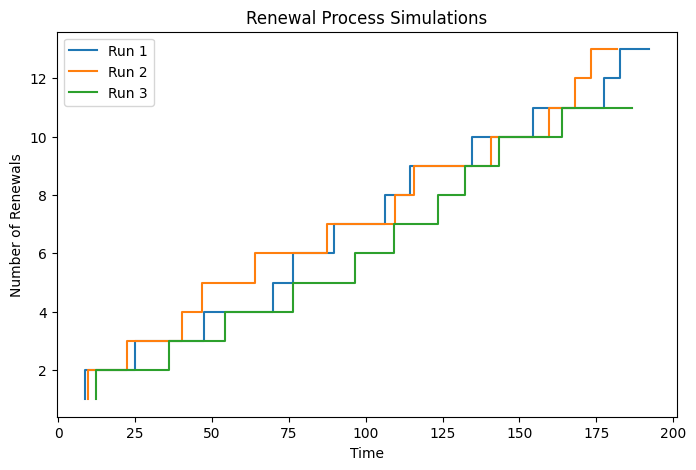

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_horizon = 200

plt.figure(figsize=(8,5))
for i in range(3):  # three runs
    interarrivals = np.random.uniform(5, 25, size=200)
    arrival_times = np.cumsum(interarrivals)
    arrival_times = arrival_times[arrival_times <= time_horizon]
    plt.step(arrival_times, range(1, len(arrival_times)+1), label=f"Run {i+1}")

plt.title("Renewal Process Simulations")
plt.xlabel("Time")
plt.ylabel("Number of Renewals")
plt.legend()
plt.show()

####**Renewal Process Example Problem**

A factory machine has lifetimes that are uniformly distributed between 5 and 15 hours. Each replacement costs \$120. Using renewal theory, determine the long-run average replacement cost per hour.

**Hint:** Apply the Renewal Reward Theorem. The reward is the cost of replacement.

*Solution at the bottom of the report*

## Brownian Motion

####**Definition**

Brownian Motion (also called the Wiener process) is a continuous-time stochastic process that models random continuous movement. It arises as a scaling limit of simple symmetric random walks. Formally, a process $ {X(t), t ≥ 0} $ is a Brownian motion if:


1.   $ X(0) = 0 $
2.   Has independent and stationary increments
3.   For each $ t > 0, X(t) ~ N(0,σ^2t) $
4.   Paths are continuous almost surely

For reason that will be explained later, Brownian motion can actually be thought of as continuous-time martingales.

####**Brownian Motion Fundamentals**


***Random Walk Foundation***

Imagine aparticle on a number line that takes one step every second.


*   With probability $ \frac{1}{2} $, it moves right by distance $ Δx $
*   With probability $ \frac{1}{2} $, it moves left by distance $ Δx $

Formally, this can be defined as:

$$
S_n = \sum_{i=1}^{n} X_i,
\quad \text{where }
X_i =
\begin{cases}
+\Delta x, & \text{w.p. } 1/2 \\
-\Delta x, & \text{w.p. } 1/2
\end{cases}
$$

Here $ S_n $ is the position after n steps, and each $ X_i $ is an independent, identically distributed step.

But now we want to describe this walk not just after n steps, but as a function of continuous time. Supposed each step occurs after a time increment $ Δt $. Then after $ t = nΔt $, the position is:

$$
S(t) = S_n = \sum_{i=1}^{t/\Delta t} X_i
$$

We’ve now scaled by linking the number of steps n to elapsed time t.

As your continuous, time scaled random walk marches forward, you must take into consideration the walk’s variance growth. To understand variance growth, understand that it is technically possible (although unlikely assuming equal probability to move in any given direction) for your random walk to “drift” or randomly sway in one specific direction. Imagine sour particle having a long series of only right or only left movements; this behavior should be captured in variance growth.

The variance of S(t) is defined as:

$$
\mathrm{Var}[S(t)] = \frac{t}{\Delta t} (\Delta x)^{2}
$$

Where $ \frac{t}{Δt} $ represents the n number of time increments  (infinite in the fully continuous case). And as you can see, assuming t is very large, it could capture a wide range of viable locations for our particle, away from $ E[S(t)] = 0 $.

To get a non-degenerate continuous limit , we must choose $ Δx $ and $ Δt $ so that variance grows proportionally to time t. The critical scaling:

$$
Δx = σ\sqrt{Δt}
$$

Here, $ σ > 0 $ is a constant (our volatility parameter). If $ Δx $ shrinks too slowly or quickly relative to ∆t, the variance would blow up or collapse to zero. The square-root scaling balances the two so that the limiting variance is finite and linear in time. shrinks too slowly or quickly relative to ∆t, the variance would blow up or collapse to zero. The square-root scaling balances the two so that the limiting variance is finite and linear in time.

Now let’s assume that ∆t and ∆x approach 0, the rescaled process now converges in distribution to a continuous-time process B(t) with properties:

*   $ B(0) = 0 $
*   Increments $ B(t + s) - B(t)$ are independent and normally distributed: $ B(t+s) - B(t) ∼ N(0, σ^2s)$
*   Paths are surely continuous

This limiting process takes us from jagged steps in our time interval to seemingly smooth, continuous movement, defining Brownian motion. Technically, our path is smooth, yes, but also infinitely rough – Brownian paths are continuous everywhere but differentiable nowhere.


***Stationary and Independent Increments***

Stationarity: The distribution of $B(t+s)\ -\ B(t)$ depends only on the time gap s, not the absolute location t. This follows because the random walk increments are identically distributed at each step.

Independence: Non-overlapping increments of the random walk are independent; in the limit, Brownian increments inherit this property.

Together, these two give the memoryless in distribution feature of Brownian motion: knowing what happened up to time t doesn’t affect the distribution of what happens I the next interval – only the variance grows with elapse time.  

***Gaussian (a.k.a. Normal) Distribution***

Brownian increments are normally distributed:

$$ X(t+s) - X(t) ∼ N(0, σ^2s) $$


This links Brownian motion with Gaussian theory: the entire path distribution is determined by means, variances, and covariances.

Another way to see the Gaussian nature of Brownian motion is through its covariance. Seeing as covariance measure how two random variables move together, we’re therefore asking how is the value at time s related to the value at time t?

If we look at B(t) for some $ t > s $, you can naturally split it into:
$$ B\left(t\right)=B\left(s\right)+\left(B\left(t\right)-B\left(s\right)\right) $$

As mentioned above, a defining property of Brownian motion is that increments over disjoint intervals are independent.

*   So $B(s)$ and $ [B(t) - B(s)] $ are independent
*   And the increment $ B(t) - B(s) $ has mean 0

Now, the covariance function

$$ Cov(B(s), B(t)) = E[B(s)B(t)] $$

can be expanded using the split above for B(t):

$$ E[B(s)B(t)] = E[B(s)B(s) + B(s)(B(t) - B(s))] $$

This simplifies:

$$ E[B(s)B(t)] = E[B(s)^2] + E[B(s)(B(t) - B(s))] $$

The entire second term vanishes as the $B(s)$ and $B(t)$ are independent of each other, and the expected value of $B(s)$ reduces to zero, leaving:

$$ E[B(s)^2] = Var(B(s)) = σ^2s $$

Therefore:

$$ Cov(B(s), B(t)) = σ^2s $$ Where $$ s < t $$

If we instead assumed that $ t < s $, the same logic would return $σ^2t$, meaning the general covariance formula is:

$$ Cov(B(s), B(t)) = σ^2min(s,t) $$

The covariance between two Brownian motion values depends only on how shared history they have. The smaller of the two times, $ min(s,t) $, is the overlap of the intervals $ [0,s] $ and $ [0,t] $.

####**Brownian Motion Deep Dive**

As mentioned earlier, Brownian paths are continuous, and almost surely nowhere differentiable; zooming in would reveal their “infinite roughness.” Because of this infinite roughness, ordinary calculus cannot handle Brownian paths, leading to the development of Itô calculus .

Brownian paths also exhibit Markov and Martingale properties, hence them being referred to as continuous time Martingales. Nevertheless, Brownian motion in its distribution:

$$ P\big(B(t+s) \in A \,\big|\, \mathcal{F}_{t}\big)
= P\big(B(t+s) \in A \,\big|\, B(t)\big) $$


In words, the Markov property states that the probability that the Brownian motion is in some set A at future time $t+s$, given everything we know up to time $t$, depends on only its present position $B(t)$, not on the full history of how it got there.

The Martingale property asserts, just as it did above, that the future expected value of a future time $t+s$ given its filtration is equal to the current value of the Brownian path:

$$ E[B(t+s) | \mathcal{F}_{t}\big] = B(t) $$

Another fascinating property of Brownian motion is that it’s “self-similarity.” No matter how far you in or out you zoom in time and space, the process looks statistically the same (not to be confused with geometrically the same). Below is the mathematical expression that describes this property:

$$ \{ B(ct) : t \geq 0 \}
= \{ \sqrt{c}\, B(t) : t \geq 0 \},
\quad \text{for all } c > 0 $$


$ B(ct) $ means you look at the Brownian path but speed it up (for $c > 1$) or slow it down (for $c < 1$) in the time axis. However, $\sqrt c B\left(t\right)$ means you rescale the space axis (the vertical displacements) by $ \sqrt c $. The equal sign in the middle indicates that these two statements are “equal in distribution”, they have the same law even though they are not literally the same sample paths.

Take a 1-minute sample of Brownian motion and zoom in on it, then compare it with a 10-minute sample that’s been rescaled appropriately. You’ll notice that they’re indistinguishable in distribution.


####**Brownian Motion Real-World Applications**

Brownian motion, originally named after Robert Brown's 1827 observation of pollen grains in water, is a cornerstone of modern modeling in physics, finance, and engineering. Within physics, Brownian motion models heat transfer and diffusion, and describes how particles spread out over time due to random collisions. In finance, it underlies the modeling of stock prices as geometric Brownian motion, which drives the Black–Scholes model of option pricing and is the basis of quantitative finance. In biology, Brownian motion is used to describe random foraging movements of animals and stochastic fluctuations in population dynamics. Engineers use Brownian motion to model noise in communication systems, treating cumulative random disturbances as continuous stochastic processes. Finally, in applied mathematics, Brownian motion is the fundamental building block of stochastic differential equations (SDEs), which are used across science and engineering to model systems influenced by uncertainty. Its usefulness across fields shows why Brownian motion is considered the prototypical stochastic process.

####**Brownian Motion Simulation**

Brownian motion is visually easier to differnetiate from Martingale and Renewal process by adding another dimmension. Graphing in 3D highlights the sporatic step nature of this stochastic process instead of looking nearly identical to Martingales by just hovering around 0.

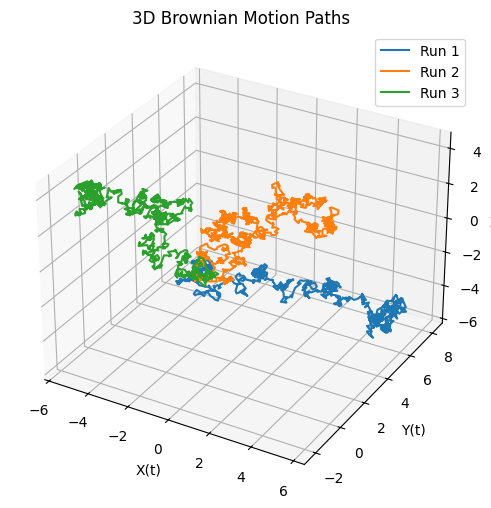

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

n = 1000
dt = 0.01
dim = 3

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

for i in range(3):
    increments = np.sqrt(dt) * np.random.randn(n, dim)
    path = np.cumsum(increments, axis=0)
    ax.plot(path[:,0], path[:,1], path[:,2], lw=1.5, label=f"Run {i+1}")

ax.set_title("3D Brownian Motion Paths")
ax.set_xlabel("X(t)")
ax.set_ylabel("Y(t)")
ax.set_zlabel("Z(t)")
ax.legend()
plt.show()

####**Brownian Motion Example Problem**

Supposed B(t) is a standard Brownian motion. What is the probability that B(2) is greater than 1, given that B(1) = .2?

**Hint:** Use the Markov property and Gaussian increments of Brownian motion.

*Solution at the bottom of the report*

## Example Problem Solutions

***Martingale Example Problem Solution***

1. Let $S_n$ be wealth after $n$ rounds with $S_0 = 5$. Since the coin is fair, $\{S_n\}$ is a martingale: $$ E[S_{n+1} | F_n] = S_n $$

2. Let $ T = inf\{n ≥ 0: S_n ∈ \{0,10\}\}$ be the stopping time.

3. Under standard bounded-stopping conditions, Optional Stopping gives $ E[S_T] = E[S_0] = 5. $

4. At time $T$, $S_T ∈ \{0,10\}$. Let $α = P(S_T = 10)$. Then $$ E[S_T] = 10 * α + 0 * (1-α) = 10α.$$

5. Equate expectations: $10α = 5 => α = \frac{5}{10} = 0.5$

***Renewal Process Example Problem Solution***

1. Interarrival (lifetime) mean: $$ μ = E[T] = \frac{5+15}{2} = 10 $$

2. Reward per cycle (cost) is constant: $$ η - E[R] = 120 $$

3. Renewal Reward Theorem: long-run average reward (cost) rate is
$$ \lim_{t \to \infty} \frac{R(t)}{t} = \frac{\eta}{\mu} = \frac{120}{10} = 12
$$

Interpretation: In the long run, you spend $12 per hour on replacements.

***Brownian Motion Example Problem Solution***

1. By independent, stationary increments (Markov property):
$$ B(2) | B(1) = 0.2 ∼ N(0.2, 2-1) = N(0.2,1) $$

2. Standardize the threshold 1:

$$ P(B(2) > 1 | B(1) = 0.2) = P(Z > \frac{1-0.2}{1}) = 1 - 𝚽(0.8) $$

3. Numeric value (if desired): $𝚽(0.8) ≈ .788145$, hence

$$ P(B(2) > 1 | B(1) = 0.2) = 1 - 𝚽(0.8) ≈ .211855 $$